In [772]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn
import psycopg2 as psy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [773]:


air_oper = pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/assets/Airport_operations.csv',)
air_canc = pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/assets/airport_cancellations.csv')
air_info =pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/assets/airports.csv')

In [774]:
air_oper.columns = ['airport', 'year','dept_comp','arriv_comp', 'ontime_gate_dept', 'ontime_air_dept','ontime_gate_arriv','gate_delay','taxi_out_time','taxi_out_delay', 'air_dept_delay','airborn_delay','taxi_in_delay','block_delay', 'gate_arrive_delay']

In [775]:

air_canc.columns = ['airport', 'year','dept_cancel','arriv_cancel', 'dept_diversions', 'arriv_diversions']

In [776]:
air_info.columns = ['key', 'airport','ap_name','alias', 'fac_type', 'faa_region', 'county','city','state', 'ap_type', 'latitude', 'longitude', 'bound_data']

In [777]:
air_oper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 15 columns):
airport              841 non-null object
year                 841 non-null int64
dept_comp            841 non-null int64
arriv_comp           841 non-null int64
ontime_gate_dept     841 non-null float64
ontime_air_dept      841 non-null float64
ontime_gate_arriv    841 non-null float64
gate_delay           841 non-null float64
taxi_out_time        841 non-null float64
taxi_out_delay       841 non-null float64
air_dept_delay       841 non-null float64
airborn_delay        841 non-null float64
taxi_in_delay        841 non-null float64
block_delay          841 non-null float64
gate_arrive_delay    841 non-null float64
dtypes: float64(11), int64(3), object(1)
memory usage: 98.6+ KB


In [778]:
air_canc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 6 columns):
airport             805 non-null object
year                805 non-null float64
dept_cancel         805 non-null float64
arriv_cancel        805 non-null float64
dept_diversions     805 non-null float64
arriv_diversions    805 non-null float64
dtypes: float64(5), object(1)
memory usage: 37.8+ KB


In [779]:

air_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 13 columns):
key           5164 non-null float64
airport       5152 non-null object
ap_name       5164 non-null object
alias         3498 non-null object
fac_type      5164 non-null object
faa_region    5164 non-null object
county        5164 non-null object
city          5164 non-null object
state         5164 non-null object
ap_type       5164 non-null object
latitude      5164 non-null float64
longitude     5164 non-null float64
bound_data    5164 non-null object
dtypes: float64(3), object(10)
memory usage: 524.8+ KB


In [780]:



df1=air_oper.merge(air_canc, on=['airport', 'year']);


In [781]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 798
Data columns (total 19 columns):
airport              799 non-null object
year                 799 non-null int64
dept_comp            799 non-null int64
arriv_comp           799 non-null int64
ontime_gate_dept     799 non-null float64
ontime_air_dept      799 non-null float64
ontime_gate_arriv    799 non-null float64
gate_delay           799 non-null float64
taxi_out_time        799 non-null float64
taxi_out_delay       799 non-null float64
air_dept_delay       799 non-null float64
airborn_delay        799 non-null float64
taxi_in_delay        799 non-null float64
block_delay          799 non-null float64
gate_arrive_delay    799 non-null float64
dept_cancel          799 non-null float64
arriv_cancel         799 non-null float64
dept_diversions      799 non-null float64
arriv_diversions     799 non-null float64
dtypes: float64(15), int64(3), object(1)
memory usage: 124.8+ KB


In [782]:
df=air_info.merge(df1)
df

,key,airport,ap_name,alias,fac_type,faa_region,county,city,state,ap_type,...,taxi_out_delay,air_dept_delay,airborn_delay,taxi_in_delay,block_delay,gate_arrive_delay,dept_cancel,arriv_cancel,dept_diversions,arriv_diversions
0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,...,2.27,12.43,1.88,0.79,3.39,12.28,330.0,289.0,55.0,28.0
1,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,...,3.03,14.43,1.63,1.36,4.04,14.65,315.0,282.0,64.0,36.0
2,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,...,4.28,14.34,1.73,1.29,4.19,14.17,257.0,233.0,63.0,44.0
3,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,...,3.16,14.97,1.55,1.71,4.09,16.31,307.0,278.0,70.0,42.0
4,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,...,1.85,13.59,1.64,1.25,3.75,15.18,238.0,197.0,78.0,29.0
5,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,...,1.43,12.28,1.22,0.95,2.88,11.77,199.0,159.0,57.0,58.0
6,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,...,1.39,13.00,1.65,1.32,3.53,13.40,258.0,207.0,82.0,45.0
7,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,...,1.96,12.07,1.45,1.57,3.67,12.28,240.0,201.0,101.0,55.0
8,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,...,1.82,10.55,1.41,1.33,2.89,10.64,174.0,141.0,62.0,41.0
9,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,...,2.20,13.52,1.78,1.41,2.86,12.96,127.0,94.0,65.0,64.0


In [783]:


df.to_csv(path_or_buf="/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/data.csv", index=False)

#### 2.1 Plot and Describe the Data

In [1]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn
import psycopg2 as psy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


df =pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/data.csv')

In [2]:
df.describe()

,key,latitude,longitude,year,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,...,taxi_out_delay,air_dept_delay,airborn_delay,taxi_in_delay,block_delay,gate_arrive_delay,dept_cancel,arriv_cancel,dept_diversions,arriv_diversions
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,...,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,1714.484355,36.448807,-94.899998,2009.016270,113471.568210,113003.959950,0.779123,0.726958,0.766864,12.890250,...,3.683292,15.703504,2.875532,1.414155,3.290826,13.428811,1299.314143,1341.068836,174.250313,170.256571
std,1005.059201,6.686781,20.644996,3.150126,98059.144667,97705.308115,0.052279,0.076027,0.050502,3.036474,...,2.337325,4.364217,1.169739,0.854702,0.989275,3.251647,1840.877193,1980.459892,172.638408,229.162686
min,246.000000,18.439295,-157.922429,2004.000000,731.000000,717.000000,0.529900,0.380800,0.513600,5.350000,...,0.100000,6.290000,0.950000,0.020000,1.330000,6.330000,0.000000,0.000000,0.000000,0.000000
25%,770.000000,32.896828,-111.977773,2006.000000,42064.000000,42006.500000,0.753100,0.691800,0.742150,10.830000,...,2.300000,12.890000,2.035000,0.845000,2.615000,11.270000,349.000000,314.500000,62.000000,41.000000
50%,1531.000000,37.618972,-87.897068,2009.000000,79489.000000,79750.000000,0.784100,0.740200,0.770500,12.540000,...,3.050000,15.130000,2.620000,1.140000,3.130000,12.970000,670.000000,653.000000,111.000000,84.000000
75%,2502.000000,40.795250,-80.152741,2012.000000,166469.500000,165560.500000,0.810700,0.773700,0.797600,14.620000,...,4.220000,17.555000,3.550000,1.775000,3.815000,14.935000,1483.500000,1542.000000,237.000000,190.000000
max,3575.000000,61.174083,-66.002004,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,25.840000,...,18.940000,40.510000,7.820000,6.180000,7.520000,27.780000,16618.000000,17571.000000,1064.000000,1948.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 31 columns):
key                  799 non-null float64
airport              799 non-null object
ap_name              799 non-null object
alias                799 non-null object
fac_type             799 non-null object
faa_region           799 non-null object
county               799 non-null object
city                 799 non-null object
state                799 non-null object
ap_type              799 non-null object
latitude             799 non-null float64
longitude            799 non-null float64
bound_data           799 non-null object
year                 799 non-null int64
dept_comp            799 non-null int64
arriv_comp           799 non-null int64
ontime_gate_dept     799 non-null float64
ontime_air_dept      799 non-null float64
ontime_gate_arriv    799 non-null float64
gate_delay           799 non-null float64
taxi_out_time        799 non-null float64
taxi_out_delay       799 non-

In [4]:
df_working=df.iloc[:, 14:]
df_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 17 columns):
dept_comp            799 non-null int64
arriv_comp           799 non-null int64
ontime_gate_dept     799 non-null float64
ontime_air_dept      799 non-null float64
ontime_gate_arriv    799 non-null float64
gate_delay           799 non-null float64
taxi_out_time        799 non-null float64
taxi_out_delay       799 non-null float64
air_dept_delay       799 non-null float64
airborn_delay        799 non-null float64
taxi_in_delay        799 non-null float64
block_delay          799 non-null float64
gate_arrive_delay    799 non-null float64
dept_cancel          799 non-null float64
arriv_cancel         799 non-null float64
dept_diversions      799 non-null float64
arriv_diversions     799 non-null float64
dtypes: float64(15), int64(2)
memory usage: 106.2 KB


In [5]:
df_working.corr()

,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,taxi_out_time,taxi_out_delay,air_dept_delay,airborn_delay,taxi_in_delay,block_delay,gate_arrive_delay,dept_cancel,arriv_cancel,dept_diversions,arriv_diversions
dept_comp,1.000000,0.999807,-0.063251,-0.399942,0.103680,0.131396,0.638656,0.604125,0.391838,0.401505,0.823040,0.358669,0.102899,0.808959,0.823676,0.934147,0.798750
arriv_comp,0.999807,1.000000,-0.062713,-0.399040,0.104228,0.129871,0.636674,0.603439,0.390470,0.400179,0.822057,0.355442,0.101622,0.809994,0.824622,0.934035,0.799456
ontime_gate_dept,-0.063251,-0.062713,1.000000,0.818598,0.782703,-0.913107,-0.169598,-0.212539,-0.764464,-0.265446,-0.162607,-0.342640,-0.712282,-0.183962,-0.172420,-0.051995,-0.142091
ontime_air_dept,-0.399942,-0.399040,0.818598,1.000000,0.695697,-0.826633,-0.653223,-0.725766,-0.954832,-0.558150,-0.495327,-0.561451,-0.753545,-0.466213,-0.453081,-0.357375,-0.431068
ontime_gate_arriv,0.103680,0.104228,0.782703,0.695697,1.000000,-0.800603,-0.230311,-0.287357,-0.712975,-0.271240,-0.087212,-0.550010,-0.922723,-0.113363,-0.094130,0.067575,-0.028064
gate_delay,0.131396,0.129871,-0.913107,-0.826633,-0.800603,1.000000,0.331777,0.339046,0.886479,0.328084,0.249073,0.435036,0.850259,0.291753,0.275300,0.124451,0.218199
taxi_out_time,0.638656,0.636674,-0.169598,-0.653223,-0.230311,0.331777,1.000000,0.923359,0.688469,0.611870,0.676826,0.600592,0.442335,0.566103,0.559625,0.571622,0.558053
taxi_out_delay,0.604125,0.603439,-0.212539,-0.725766,-0.287357,0.339046,0.923359,1.000000,0.733528,0.642913,0.665664,0.579919,0.469840,0.599671,0.588159,0.554316,0.581730
air_dept_delay,0.391838,0.390470,-0.764464,-0.954832,-0.712975,0.886479,0.688469,0.733528,1.000000,0.554790,0.504119,0.589096,0.838877,0.504939,0.487547,0.360954,0.444050
airborn_delay,0.401505,0.400179,-0.265446,-0.558150,-0.271240,0.328084,0.611870,0.642913,0.554790,1.000000,0.339570,0.514464,0.392012,0.376828,0.367273,0.280685,0.322749


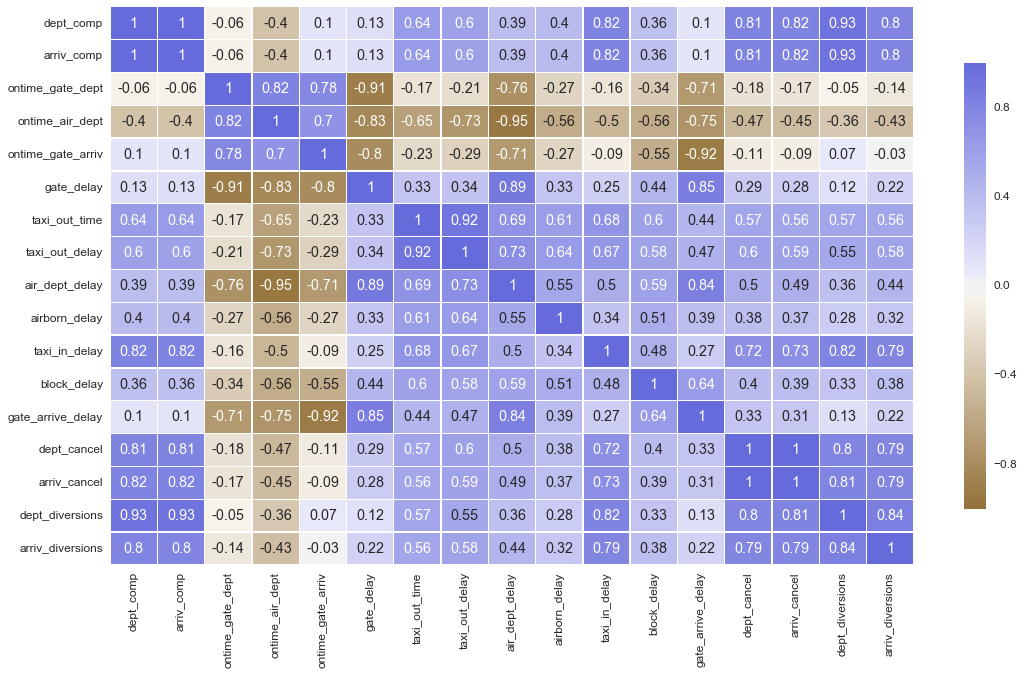

In [6]:

corr = df_working.corr().round(decimals=2)
sns.set(font_scale=1.2)
plt.subplots( figsize=(18,10))
# cmap = sns.diverging_palette(295,278, as_cmap=True)
cmap = sns.diverging_palette(55,265, as_cmap=True)
# cmap = sns.diverging_palette(258,210, as_cmap=True,s=80, l=30)
sns.heatmap (corr, annot=True,cmap=cmap,cbar_kws={"shrink": .8},linewidths=.3)


### Conducting the PCA

In [7]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df_working)

In [8]:
covMat = np.cov(X_scaled.T)

In [9]:
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [10]:
print len(eigenValues)
print len(eigenVectors)

17
17


In [11]:


print eigenValues

[  9.17680918e+00   4.16210652e+00   1.21645796e+00   6.50383255e-01
   5.10203215e-01   4.20437718e-01   2.47407511e-01   1.90068175e-01
   1.65777857e-01   1.43298219e-01   6.19936947e-02   5.37682509e-02
   1.49627279e-02   4.86205637e-03   1.71481675e-04   9.58506528e-04
   1.63693067e-03]


In [12]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i)

(9.1768091844119741, array([ 0.25885192,  0.25856244, -0.16403238, -0.27252651, -0.14753752,
        0.20056695,  0.26942785,  0.27543982,  0.27938877,  0.20144222,
        0.26722246,  0.22120597,  0.21000452,  0.26978265,  0.26812843,
        0.2490268 ,  0.25444485]))
(4.1621065164993274, array([-0.27201661, -0.27262998, -0.35033858, -0.22987049, -0.40101409,
        0.34147483, -0.04027149, -0.01939918,  0.23585036,  0.05481243,
       -0.17685623,  0.11913483,  0.33438795, -0.1756687 , -0.18689229,
       -0.27019983, -0.20487635]))
(1.2164579579257784, array([ 0.08042275,  0.08247427, -0.33007295,  0.00240815, -0.0884481 ,
        0.25730877, -0.4143432 , -0.39593382, -0.0058805 , -0.48508062,
        0.04518497, -0.28841959,  0.03846376,  0.21062511,  0.21894847,
        0.17614028,  0.17300264]))
(0.65038325526119545, array([ 0.09471498,  0.09625113, -0.2687089 , -0.29171776,  0.29493075,
        0.15272971,  0.07360325,  0.11988738,  0.18569113,  0.29895645,
       -0.10673434

In [13]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

print(varExpl)

[53.91366950718367, 24.452337481899907, 7.1466793081408477, 3.8209956393906652, 2.9974391944526655, 2.47006772182415, 1.4535168501077671, 1.1166487800724882, 0.9739433861212623, 0.84187571752339285, 0.36421238598591554, 0.31588797947822683, 0.08790588842764728, 0.028564536450887589, 0.0096169526448265461, 0.0056312170320047018, 0.0010074532637094511]


In [14]:

cvarex = np.cumsum(varExpl);
cvarex
# I indetified 3 main componets that are responsible for 85.5% variance in airport delays. 

array([  53.91366951,   78.36600699,   85.5126863 ,   89.33368194,
         92.33112113,   94.80118885,   96.2547057 ,   97.37135448,
         98.34529787,   99.18717359,   99.55138597,   99.86727395,
         99.95517984,   99.98374438,   99.99336133,   99.99899255,  100.        ])

In [15]:
eigs = pd.DataFrame(eigenValues)

eigs 

,0
0,9.176809
1,4.162107
2,1.216458
3,0.650383
4,0.510203
5,0.420438
6,0.247408
7,0.190068
8,0.165778
9,0.143298


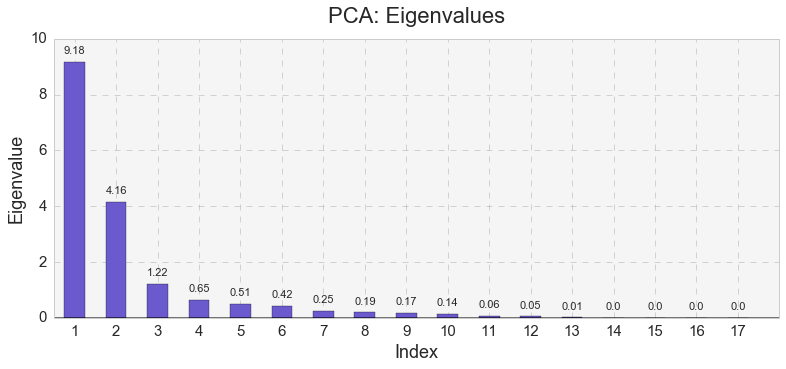

In [16]:


plt.style.use('seaborn-whitegrid')


plt.rcParams['axes.facecolor'] = 'whitesmoke'


ax=eigs.plot.bar(color = 'slateblue',legend=None,figsize=(13,5))
plt.title('PCA: Eigenvalues', fontsize = 22, y = 1.04)
plt.ylabel('Eigenvalue', fontsize = 18)
plt.xlabel('Index', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(range(-1, len(eigs)), rotation=0, fontsize = 15)
for i, label in enumerate(list(eigs.index)):
    score = eigs.ix[label][0].round(2)
    ax.annotate(str(score), (i, score + .3),ha='center', size=11) 
ax.set_xticklabels(range(0,18))
plt.yticks(fontsize = 15)
plt.xlim([-.5, len(eigs)])
plt.grid(color='gray', linestyle='--', alpha=.3)
plt.show()

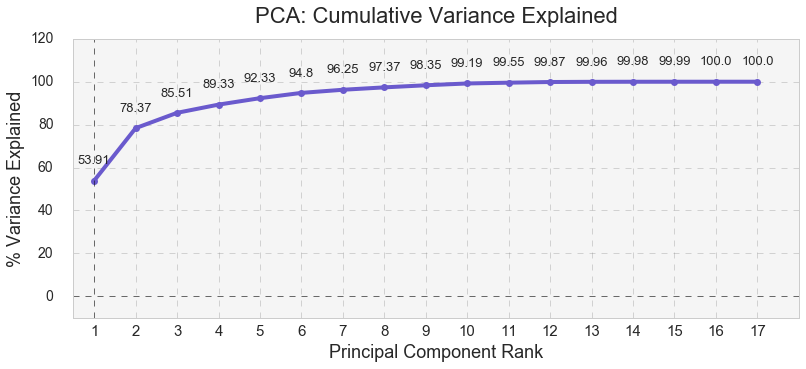

In [17]:

eigs = pd.DataFrame(cvarex)
plt.style.use('seaborn-whitegrid')


plt.rcParams['axes.facecolor'] = 'whitesmoke'

# plt.style.use('bmh')
# # plt.style.use('fivethirtyeight')

# plt.rcParams['axes.facecolor'] = 'whitesmoke'
# plt.rcParams['figure.facecolor'] = 'whitesmoke'
plt.figure(figsize=(13,5))
ax = plt.gca()
ax.set_ylabel('% Variance Explained', fontsize=18)
ax.set_xlabel('Principal Component Rank', fontsize=18)

ax.set_title('PCA: Cumulative Variance Explained', fontsize=22, y = 1.04)

ax.plot(cvarex, color = 'slateblue', linewidth = 4,marker='o')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
for i, label in enumerate(list(eigs.index)):
    score = eigs.ix[label][0].round(2)
    ax.annotate(str(score), (i, score + 6.5),ha='center', va="bottom", size=13)  
plt.xlim([-.5, len(eigs)])
plt.ylim([-10, 120])
ax.set_xticklabels(range(1,18))
plt.xticks(range(0,17, 1), fontsize=15)
ax.tick_params(axis='y', which='major', pad=20,labelsize=14)
plt.axhline(0, color='black', alpha = 0.5, linewidth = 1,linestyle='--')
plt.axvline(0, color='black', alpha = 0.5, linewidth = 1,linestyle='--')
plt.grid(color='gray', linestyle='--', alpha=.3)
plt.show()

In [18]:
pcask = PCA(n_components=3)
print pcask.fit(X_scaled).components_ # See the eigenvectors
xPC = pcask.fit_transform(X_scaled) # Use the eigenvectors to transform xStand onto new axes

[[ 0.25885192  0.25856244 -0.16403238 -0.27252651 -0.14753752  0.20056695
   0.26942785  0.27543982  0.27938877  0.20144222  0.26722246  0.22120597
   0.21000452  0.26978265  0.26812843  0.2490268   0.25444485]
 [-0.27201661 -0.27262998 -0.35033858 -0.22987049 -0.40101409  0.34147483
  -0.04027149 -0.01939918  0.23585036  0.05481243 -0.17685623  0.11913483
   0.33438795 -0.1756687  -0.18689229 -0.27019983 -0.20487635]
 [ 0.08042275  0.08247427 -0.33007295  0.00240815 -0.0884481   0.25730877
  -0.4143432  -0.39593382 -0.0058805  -0.48508062  0.04518497 -0.28841959
   0.03846376  0.21062511  0.21894847  0.17614028  0.17300264]]


In [19]:
xPC

array([[-2.16582356, -0.13151563, -0.30423941],
       [-1.08206525,  0.88338921, -0.14483223],
       [-1.00014444,  0.54956468, -0.90144519],
       ..., 
       [-2.85566429, -1.31733222, -1.35622459],
       [-3.09535599, -1.63432546, -1.33549116],
       [-2.31080423, -0.74791039, -1.4308056 ]])

In [20]:
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2','PC3'])

PCdf.head()

,PC1,PC2,PC3
0,-2.165824,-0.131516,-0.304239
1,-1.082065,0.883389,-0.144832
2,-1.000144,0.549565,-0.901445
3,-0.823584,0.994336,-0.360078
4,-1.592348,0.743179,-0.040472


In [21]:
df3 = pd.concat([PCdf, df_working,df['airport']], axis=1)

df3.head()


,PC1,PC2,PC3,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,taxi_out_time,...,air_dept_delay,airborn_delay,taxi_in_delay,block_delay,gate_arrive_delay,dept_cancel,arriv_cancel,dept_diversions,arriv_diversions,airport
0,-2.165824,-0.131516,-0.304239,60371,56735,0.8019,0.7794,0.7984,11.19,13.84,...,12.43,1.88,0.79,3.39,12.28,330.0,289.0,55.0,28.0,SJU
1,-1.082065,0.883389,-0.144832,57736,54870,0.7789,0.7464,0.7604,12.74,14.14,...,14.43,1.63,1.36,4.04,14.65,315.0,282.0,64.0,36.0,SJU
2,-1.000144,0.549565,-0.901445,55707,52948,0.8054,0.7446,0.7611,11.61,15.75,...,14.34,1.73,1.29,4.19,14.17,257.0,233.0,63.0,44.0,SJU
3,-0.823584,0.994336,-0.360078,47987,47246,0.8014,0.7522,0.7414,12.53,15.22,...,14.97,1.55,1.71,4.09,16.31,307.0,278.0,70.0,42.0,SJU
4,-1.592348,0.743179,-0.040472,44493,43448,0.8004,0.7810,0.7533,12.54,14.22,...,13.59,1.64,1.25,3.75,15.18,238.0,197.0,78.0,29.0,SJU


In [22]:
df4=df.iloc[:, 0:14]
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 14 columns):
key           799 non-null float64
airport       799 non-null object
ap_name       799 non-null object
alias         799 non-null object
fac_type      799 non-null object
faa_region    799 non-null object
county        799 non-null object
city          799 non-null object
state         799 non-null object
ap_type       799 non-null object
latitude      799 non-null float64
longitude     799 non-null float64
bound_data    799 non-null object
year          799 non-null int64
dtypes: float64(3), int64(1), object(10)
memory usage: 87.5+ KB


In [23]:
df5 = pd.concat([PCdf, df_working, df4], axis=1)

df5.head()

,PC1,PC2,PC3,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,taxi_out_time,...,fac_type,faa_region,county,city,state,ap_type,latitude,longitude,bound_data,year
0,-2.165824,-0.131516,-0.304239,60371,56735,0.8019,0.7794,0.7984,11.19,13.84,...,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,2004
1,-1.082065,0.883389,-0.144832,57736,54870,0.7789,0.7464,0.7604,12.74,14.14,...,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,2005
2,-1.000144,0.549565,-0.901445,55707,52948,0.8054,0.7446,0.7611,11.61,15.75,...,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,2006
3,-0.823584,0.994336,-0.360078,47987,47246,0.8014,0.7522,0.7414,12.53,15.22,...,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,2007
4,-1.592348,0.743179,-0.040472,44493,43448,0.8004,0.7810,0.7533,12.54,14.22,...,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,2008


In [24]:
# This data set I will need to graph my data in Tableau
df5.to_csv(path_or_buf="/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/data_for_tableau.csv", index=False)

## Plotting principal components against each other

In [25]:
df10 = df_working.copy()

df10 = (df_working - df_working.mean()) / df_working.std()

df10['PC1'] = PCdf['PC1']
df10['PC2'] = PCdf['PC2']
df10['PC3'] = PCdf['PC3']



In [26]:
melted_df = pd.melt(df10, id_vars=['PC1','PC2','PC3'])

In [27]:
melted_df.head()

,PC1,PC2,PC3,variable,value
0,-2.165824,-0.131516,-0.304239,dept_comp,-0.541516
1,-1.082065,0.883389,-0.144832,dept_comp,-0.568387
2,-1.000144,0.549565,-0.901445,dept_comp,-0.589079
3,-0.823584,0.994336,-0.360078,dept_comp,-0.667807
4,-1.592348,0.743179,-0.040472,dept_comp,-0.703438


## Plotting principal components against features

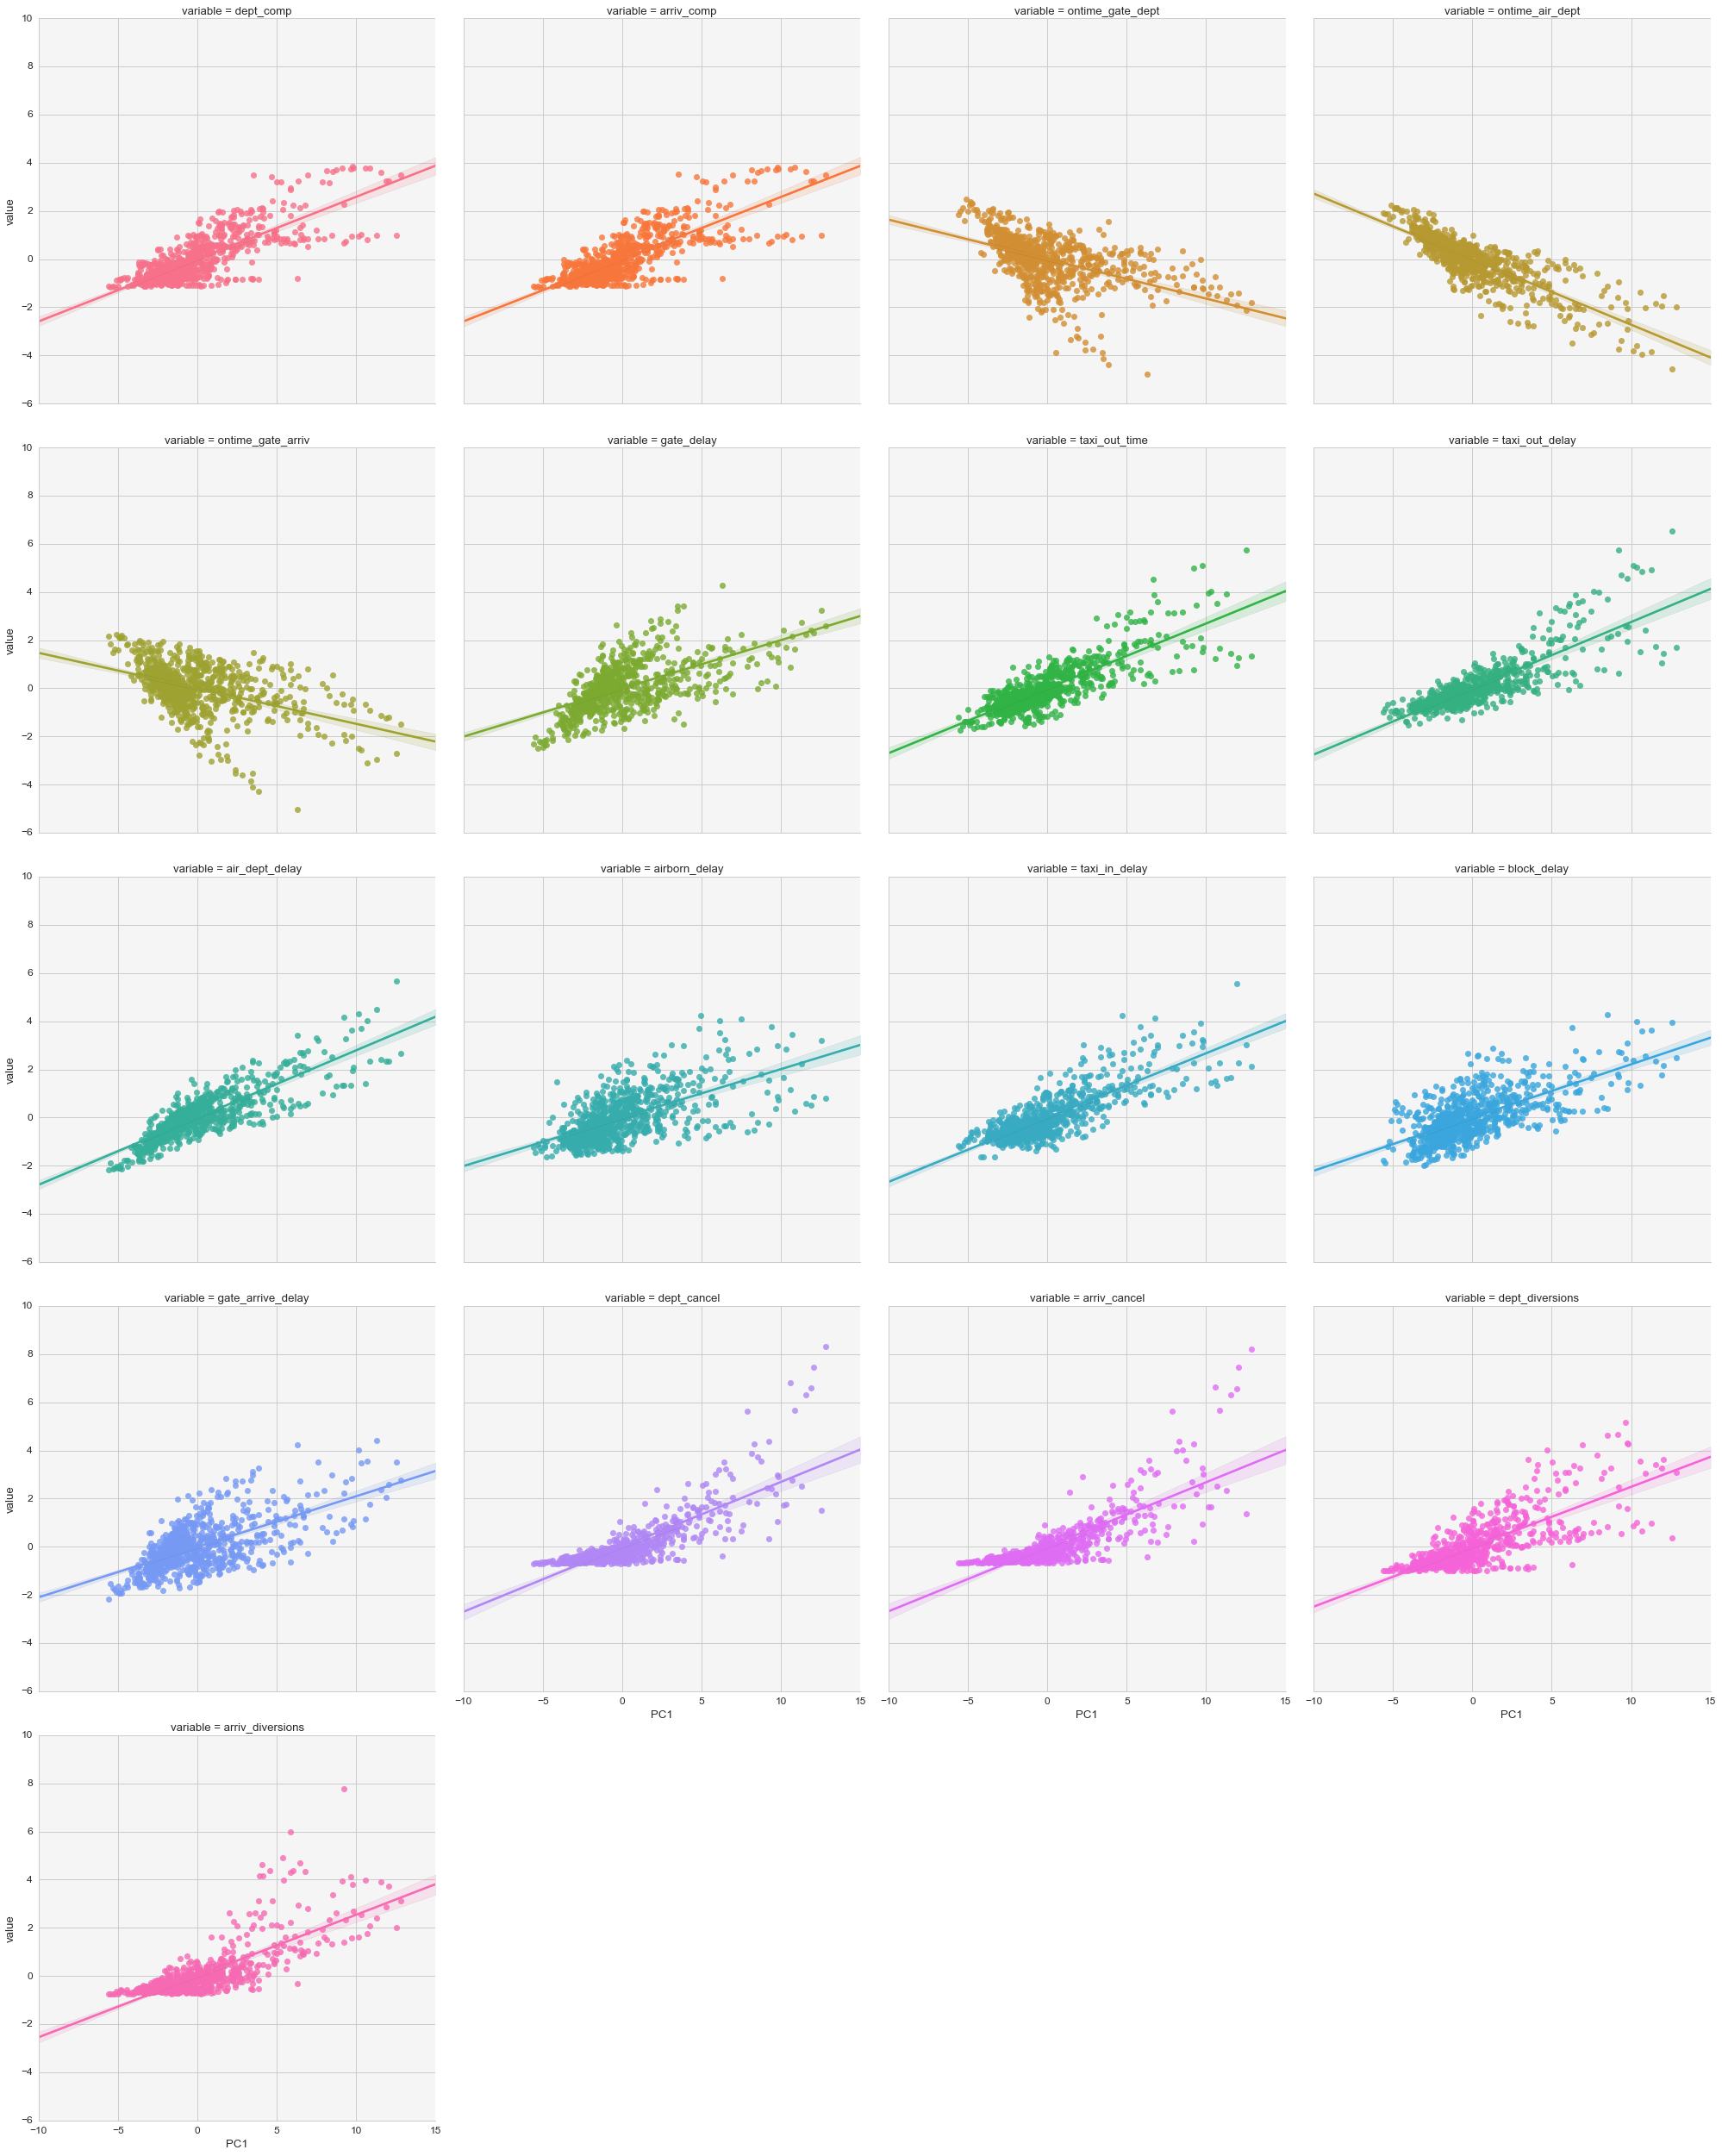

In [28]:
plt.rcParams['axes.facecolor'] = 'whitesmoke'
pca1=sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
                 data=melted_df, col_wrap=4, size=7, scatter_kws={'s':50})


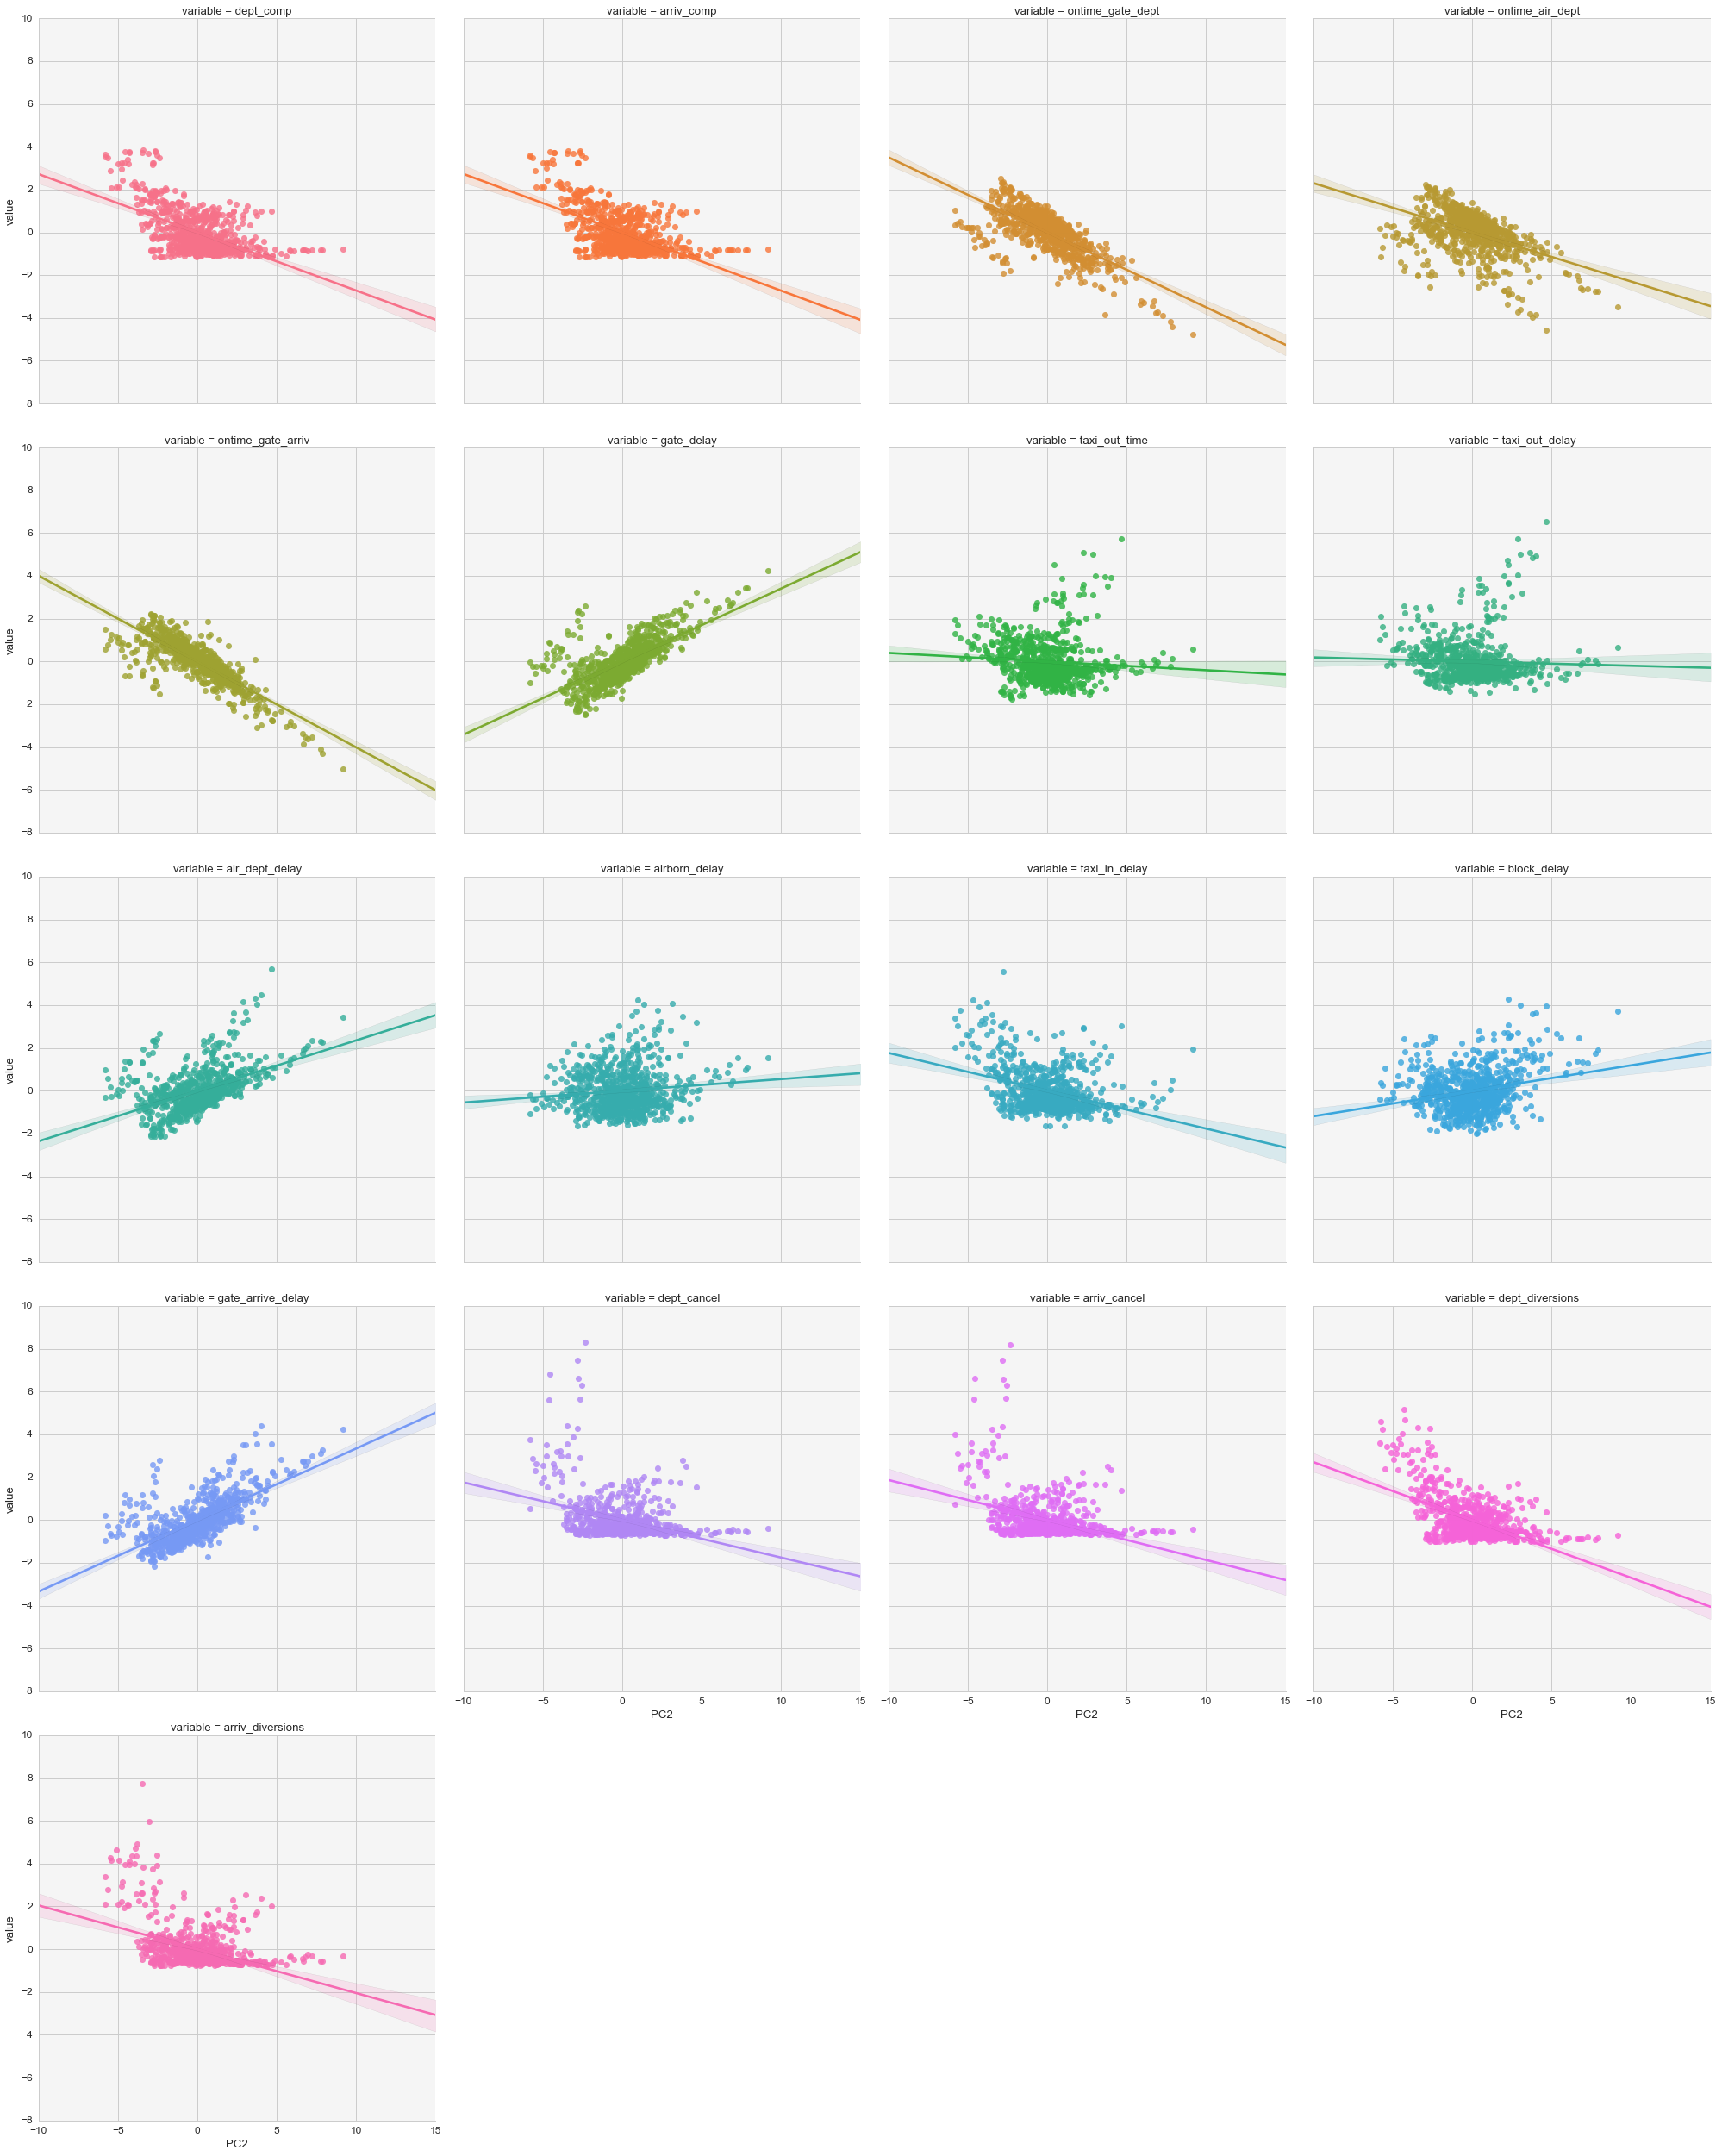

In [29]:
plt.rcParams['axes.facecolor'] = 'whitesmoke'
pc2 = sns.lmplot(x="PC2", y="value", col="variable", hue="variable", 
                 data=melted_df, col_wrap=4, size=7, scatter_kws={'s':50})

In [30]:
df3.corr().head(3)

,PC1,PC2,PC3,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,taxi_out_time,taxi_out_delay,air_dept_delay,airborn_delay,taxi_in_delay,block_delay,gate_arrive_delay,dept_cancel,arriv_cancel,dept_diversions,arriv_diversions
PC1,1.000000e+00,1.816680e-16,5.812974e-17,0.783656,0.782779,-0.496596,-0.825055,-0.446659,0.607202,0.815674,0.833874,0.845830,0.609852,0.808997,0.669685,0.635774,0.816748,0.811740,0.753911,0.770314
PC2,1.816680e-16,1.000000e+00,1.867279e-17,-0.554600,-0.555851,-0.714287,-0.468671,-0.817606,0.696215,-0.082107,-0.039552,0.480863,0.111754,-0.360583,0.242898,0.681766,-0.358162,-0.381045,-0.550896,-0.417712
PC3,5.812974e-17,1.867279e-17,1.000000e+00,0.088645,0.090907,-0.363820,0.002654,-0.097491,0.283616,-0.456706,-0.436415,-0.006482,-0.534676,0.049805,-0.317908,0.042396,0.232160,0.241334,0.194149,0.190691


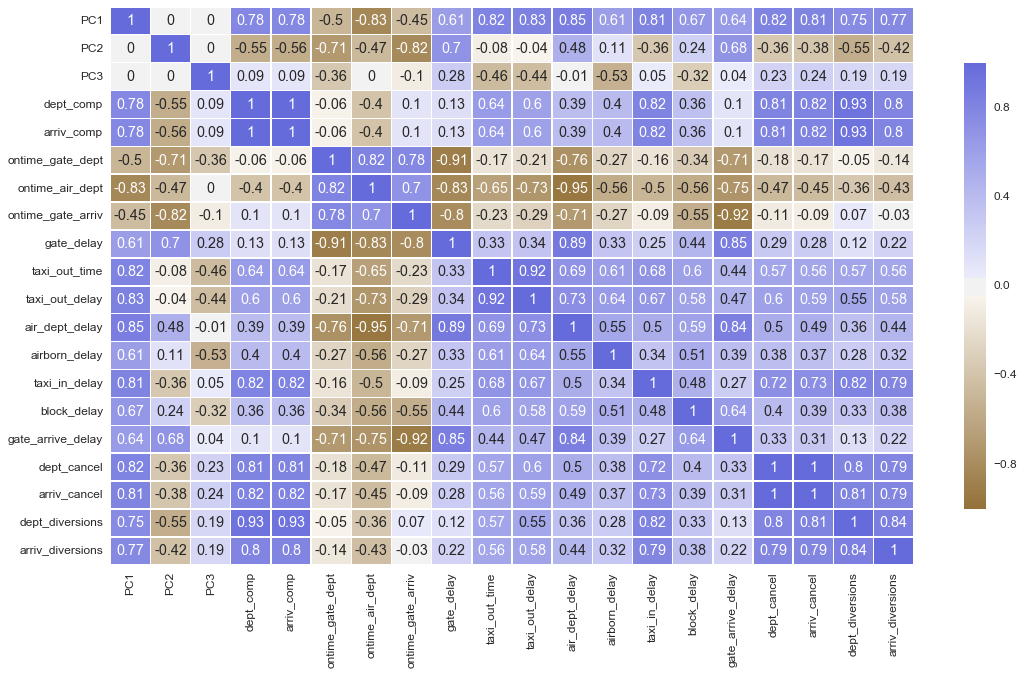

In [31]:
corr = df3.corr().round(decimals=2)
sns.set(font_scale=1.2)
plt.subplots( figsize=(18, 10))

cmap = sns.diverging_palette(55,265, as_cmap=True)
sns.heatmap (corr, annot=True,cmap=cmap,cbar_kws={"shrink": .8},linewidths=.5)



## Conducting K-means analysis

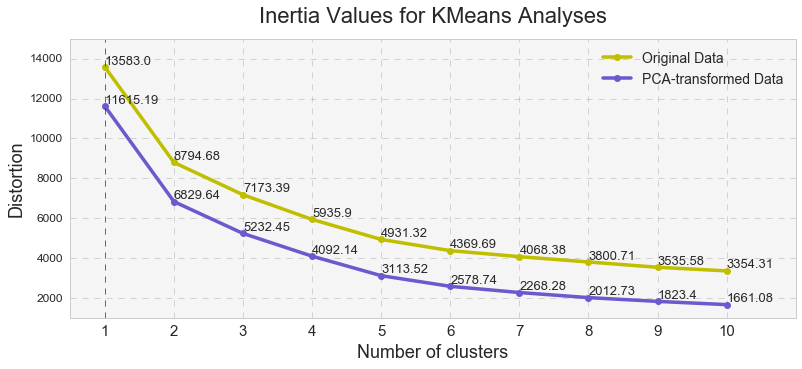

In [32]:
plt.style.use('seaborn-whitegrid')


plt.rcParams['axes.facecolor'] = 'whitesmoke'

distortions1 = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_scaled)
    distortions1.append(km.inertia_)
dist1 = pd.DataFrame(distortions1)

distortions2 = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(xPC)
    distortions2.append(km.inertia_)
dist2 = pd.DataFrame(distortions2)


plt.subplots(figsize=(13,5))

plt.plot(dist1, marker='o', color='y',  linewidth = 3.5, label='Original Data')
plt.plot(dist2, marker='o', color='slateblue',  linewidth = 3.5, label='PCA-transformed Data')

for i, label in enumerate(list(dist1.index)):
    score = dist1.ix[label][0].round(2)
    plt.annotate(str(score), (i, score+2),ha='left', va="bottom", size=13) 

for i, label in enumerate(list(dist2.index)):
    score = dist2.ix[label][0].round(2)
    plt.annotate(str(score), (i, score+2),ha='left', va="bottom", size=13) 
    
plt.xlim([-.5, len(dist1)])
plt.ylim([1000, 15000])
plt.xticks(range(0,11,1),fontsize=15)

ax = plt.gca()
ax.set_xticklabels(range(1,11))
plt.legend(fontsize=14)
plt.xlabel('Number of clusters',fontsize=18)
plt.ylabel('Distortion',fontsize=18)
plt.title("Inertia Values for KMeans Analyses", fontsize=22, y=1.04)

plt.axvline(0, color='black', alpha = 0.5, linewidth = 1,linestyle='--')
plt.grid(color='gray', linestyle='--', alpha=.3)
plt.show()

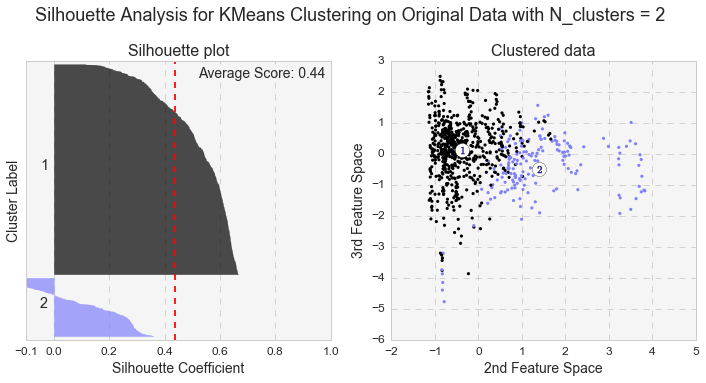

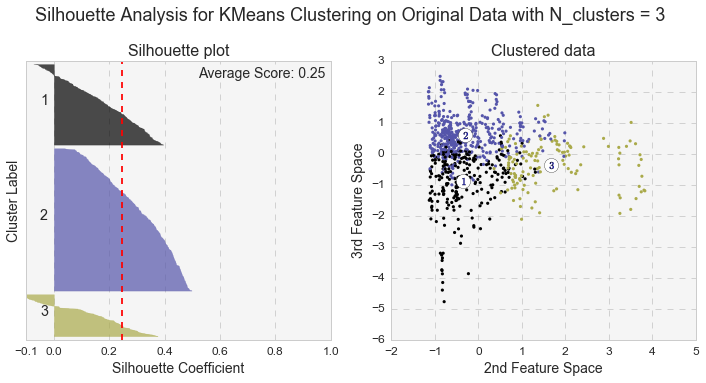

In [33]:
plt.style.use('seaborn-whitegrid')


plt.rcParams['axes.facecolor'] = 'whitesmoke'
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples,silhouette_score

X=X_scaled

range_n_clusters = [2,3]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    labels= clusterer.fit(X)
    cluster_labels=labels.labels_


    silhouette_avg = silhouette_score(X, cluster_labels)
    ax1.annotate('Average Score: %.2f' % silhouette_avg, xy=(1, 5), xytext=(0.52, 50),\
                 fontsize=14)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.gist_stern(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10 

    ax1.set_title("Silhouette plot",fontsize=16)
    ax1.set_xlabel("Silhouette Coefficient",fontsize=14)
    ax1.set_ylabel("Cluster Label",fontsize=14)
    

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.grid(color='gray', linestyle='--', alpha=.3)
    ax1.invert_yaxis()

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
    colors = plt.cm.gist_stern(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 1], X[:, 2], marker='.', s=40, lw=0,
                c=colors)
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 1], centers[:, 2],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[2], marker='$%d$' % (i+1), alpha=1, s=50)



    ax2.set_title("Clustered data", fontsize=16)
    ax2.set_xlabel("2nd Feature Space",fontsize=14)
    ax2.set_ylabel("3rd Feature Space",fontsize=14)
    ax2.grid(color='gray', linestyle='--', alpha=.3)

    plt.suptitle(("Silhouette Analysis for KMeans Clustering on Original Data "
                  "with N_clusters = %d" % n_clusters),
                 fontsize=18, y=1.05)

    plt.show()

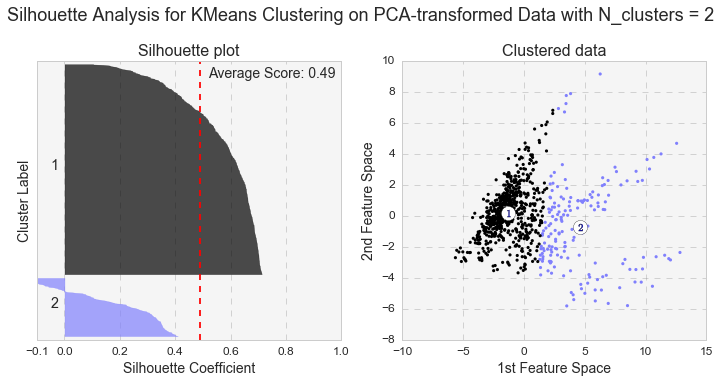

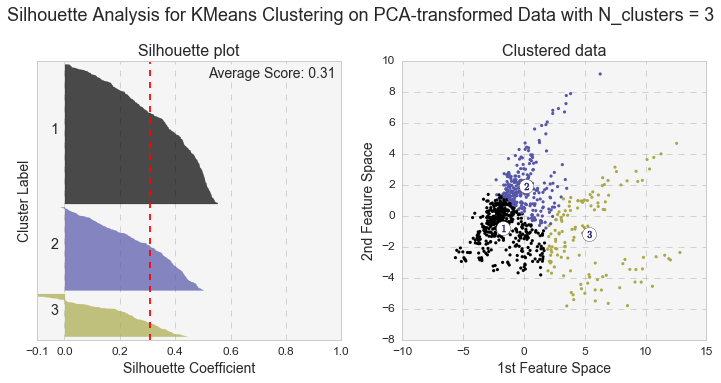

In [36]:
plt.style.use('seaborn-whitegrid')


plt.rcParams['axes.facecolor'] = 'whitesmoke'
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples,silhouette_score

X=xPC

range_n_clusters = [2,3]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    labels= clusterer.fit(X)
    cluster_labels=labels.labels_


    silhouette_avg = silhouette_score(X, cluster_labels)
    ax1.annotate('Average Score: %.2f' % silhouette_avg, xy=(1, 5), xytext=(0.52, 50),\
                 fontsize=14)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.gist_stern(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10 

    ax1.set_title("Silhouette plot",fontsize=16)
    ax1.set_xlabel("Silhouette Coefficient",fontsize=14)
    ax1.set_ylabel("Cluster Label",fontsize=14)
    

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.grid(color='gray', linestyle='--', alpha=.3)
    ax1.invert_yaxis()

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
    colors = plt.cm.gist_stern(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=40, lw=0,
                c=colors)
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1, s=50)



    ax2.set_title("Clustered data", fontsize=16)
    ax2.set_xlabel("1st Feature Space",fontsize=14)
    ax2.set_ylabel("2nd Feature Space",fontsize=14)
    ax2.grid(color='gray', linestyle='--', alpha=.3)

    plt.suptitle(("Silhouette Analysis for KMeans Clustering on PCA-transformed Data "
                  "with N_clusters = %d" % n_clusters),
                 fontsize=18, y=1.05)

    plt.show()

In [37]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(xPC)

In [38]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [39]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
print(centroids)

[[ 4.58451282 -0.69404842 -0.11942778]
 [-1.27632837  0.19322308  0.03324869]]


In [41]:
df3['cluster'] = pd.Series(clusters.labels_)
df3['cluster'].value_counts()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 22 columns):
PC1                  799 non-null float64
PC2                  799 non-null float64
PC3                  799 non-null float64
dept_comp            799 non-null int64
arriv_comp           799 non-null int64
ontime_gate_dept     799 non-null float64
ontime_air_dept      799 non-null float64
ontime_gate_arriv    799 non-null float64
gate_delay           799 non-null float64
taxi_out_time        799 non-null float64
taxi_out_delay       799 non-null float64
air_dept_delay       799 non-null float64
airborn_delay        799 non-null float64
taxi_in_delay        799 non-null float64
block_delay          799 non-null float64
gate_arrive_delay    799 non-null float64
dept_cancel          799 non-null float64
arriv_cancel         799 non-null float64
dept_diversions      799 non-null float64
arriv_diversions     799 non-null float64
airport              799 non-null object
cluster           

## Plotting K-means clusters with principal components 

In [42]:
df3_copy=df3.copy(deep=True)

df3_copy['cluster']=df3_copy['cluster'].apply(lambda x: 'Cluster 1' if x==0 else 'Cluster 2')

df3_copy['cluster'].value_counts()

df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 22 columns):
PC1                  799 non-null float64
PC2                  799 non-null float64
PC3                  799 non-null float64
dept_comp            799 non-null int64
arriv_comp           799 non-null int64
ontime_gate_dept     799 non-null float64
ontime_air_dept      799 non-null float64
ontime_gate_arriv    799 non-null float64
gate_delay           799 non-null float64
taxi_out_time        799 non-null float64
taxi_out_delay       799 non-null float64
air_dept_delay       799 non-null float64
airborn_delay        799 non-null float64
taxi_in_delay        799 non-null float64
block_delay          799 non-null float64
gate_arrive_delay    799 non-null float64
dept_cancel          799 non-null float64
arriv_cancel         799 non-null float64
dept_diversions      799 non-null float64
arriv_diversions     799 non-null float64
airport              799 non-null object
cluster           

In [43]:
colors = {'Cluster 1' : 'slateblue', 'Cluster 2' : 'y'}
liq_list = ['Cluster 1','Cluster 2']

df3_copy['cluster'].value_counts()

Cluster 2    625
Cluster 1    174
Name: cluster, dtype: int64

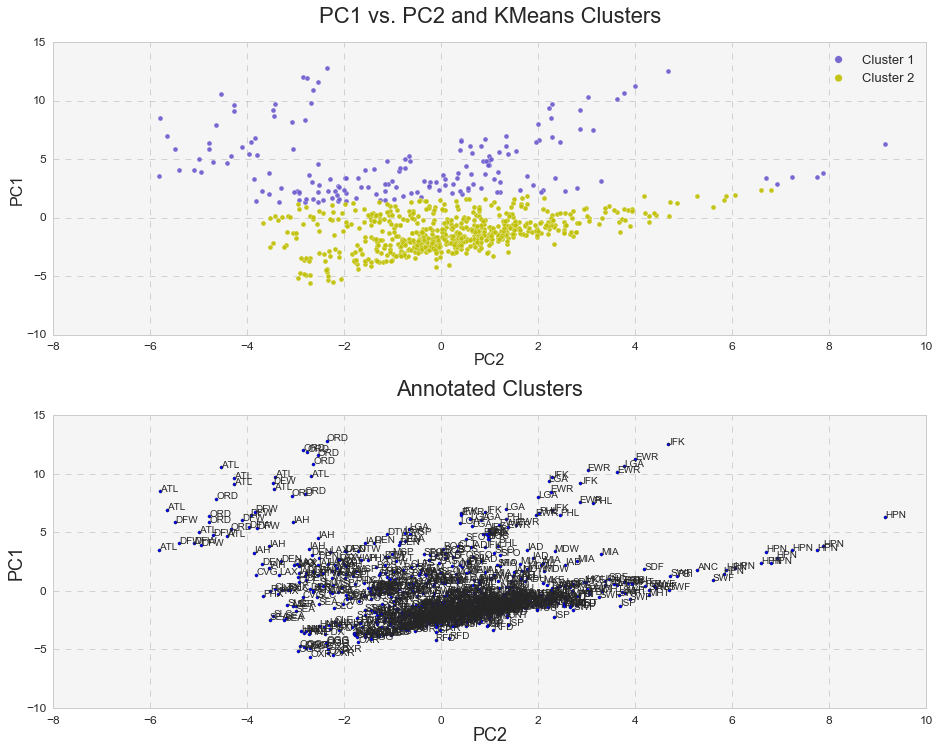

In [44]:
# plt.style.use('bmh')
# plt.style.use('fivethirtyeight')

plt.style.use('seaborn-whitegrid')


plt.rcParams['axes.facecolor'] = 'whitesmoke'


fig, ax = plt.subplots(2,1, figsize=(13,10))
plt.tight_layout(h_pad=4)
for i in liq_list:
    y = df3_copy[df3_copy['cluster'] == i]
    ax[0].scatter(y['PC2'],y['PC1'] , color = colors[i],s=25,\
    label = i, alpha=.9, edgecolor='white')
ax[0].set_title("PC1 vs. PC2 and KMeans Clusters", y=1.05,fontsize=22)   
ax[0].legend(loc='upper right', fontsize = 13,markerscale=1.5) 
ax[0].set_xlabel('PC2',fontsize=16,labelpad=1)
ax[0].set_ylabel('PC1',fontsize=16,labelpad=1)
ax[0].grid(color='gray', linestyle='--', alpha=.3)


ax[1].scatter(df3_copy['PC2'],df3_copy['PC1'] , s=10)
for i, airport in enumerate(df3['airport']):
    ax[1].annotate(airport, (df3_copy.iloc[i].PC2, df3_copy.iloc[i].PC1),fontsize=10)
ax[1].set_title("Annotated Clusters", y=1.05,fontsize=22)
ax[1].set_xlabel('PC2',fontsize=18,labelpad=1)
ax[1].set_ylabel('PC1',fontsize=18,labelpad=1)
ax[1].grid(color='gray', linestyle='--', alpha=.3)

plt.show()

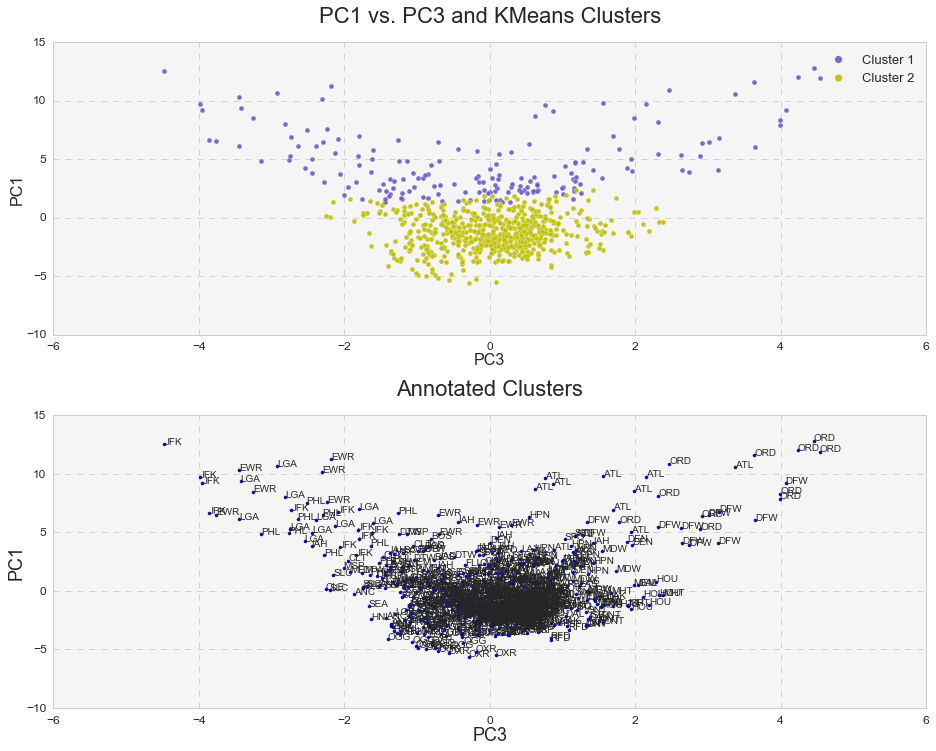

In [45]:
# plt.style.use('bmh')
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid')


plt.rcParams['axes.facecolor'] = 'whitesmoke'

fig, ax = plt.subplots(2,1, figsize=(13,10))
plt.tight_layout(h_pad=4)
for i in liq_list:
    y = df3_copy[df3_copy['cluster'] == i]
    ax[0].scatter(y['PC3'],y['PC1'] , color = colors[i],s=25,\
    label = i, alpha=.9, edgecolor='white')
ax[0].set_title("PC1 vs. PC3 and KMeans Clusters", y=1.05,fontsize=22)   
ax[0].legend(loc='upper right', fontsize = 13,markerscale=1.5) 
ax[0].set_xlabel('PC3',fontsize=16,labelpad=1)
ax[0].set_ylabel('PC1',fontsize=16,labelpad=1)
ax[0].grid(color='gray', linestyle='--', alpha=.3)


ax[1].scatter(df3_copy['PC3'],df3_copy['PC1'] , s=10)
for i, airport in enumerate(df3['airport']):
    ax[1].annotate(airport, (df3_copy.iloc[i].PC3, df3_copy.iloc[i].PC1),fontsize=10)
ax[1].set_title("Annotated Clusters", y=1.05,fontsize=22)
ax[1].set_xlabel('PC3',fontsize=18,labelpad=1)
ax[1].set_ylabel('PC1',fontsize=18,labelpad=1)
ax[1].grid(color='gray', linestyle='--', alpha=.3)

plt.show()

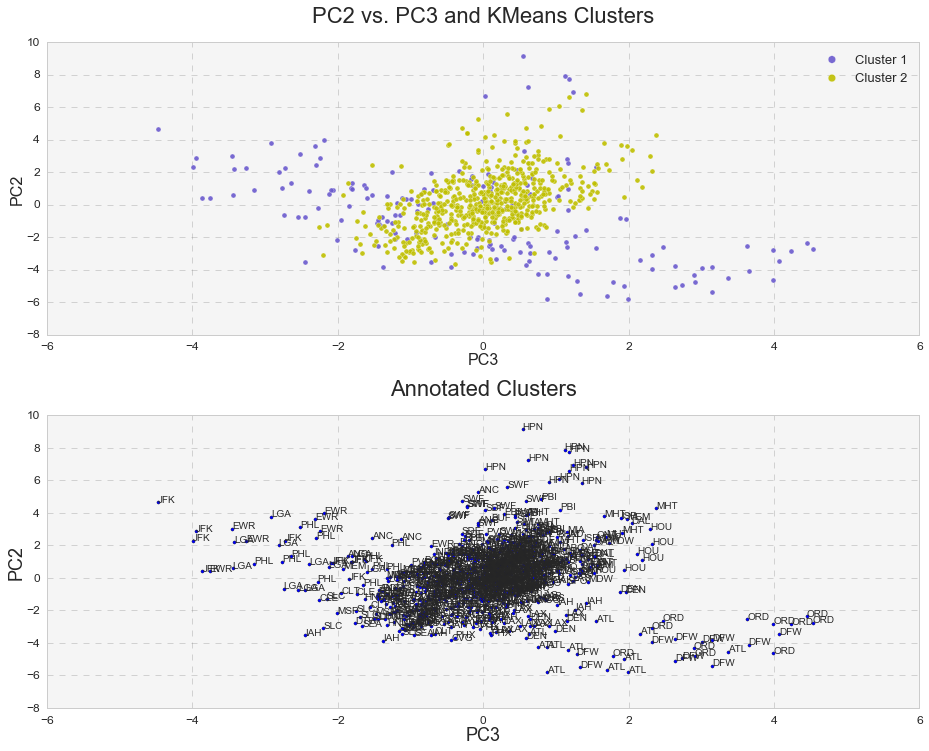

In [46]:
# plt.style.use('bmh')
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid')

plt.rcParams['axes.facecolor'] = 'whitesmoke'

fig, ax = plt.subplots(2,1, figsize=(13,10))
plt.tight_layout(h_pad=4)
for i in liq_list:
    y = df3_copy[df3_copy['cluster'] == i]
    ax[0].scatter(y['PC3'],y['PC2'] , color = colors[i],s=25,\
    label = i, alpha=.9, edgecolor='white')
ax[0].set_title("PC2 vs. PC3 and KMeans Clusters", y=1.05,fontsize=22)   
ax[0].legend(loc='upper right', fontsize = 13,markerscale=1.5) 
ax[0].set_xlabel('PC3',fontsize=16,labelpad=1)
ax[0].set_ylabel('PC2',fontsize=16,labelpad=1)
ax[0].grid(color='gray', linestyle='--', alpha=.3)


ax[1].scatter(df3_copy['PC3'],df3_copy['PC2'] , s=10)
for i, airport in enumerate(df3['airport']):
    ax[1].annotate(airport, (df3_copy.iloc[i].PC3, df3_copy.iloc[i].PC2),fontsize=10)
ax[1].set_title("Annotated Clusters", y=1.05,fontsize=22)
ax[1].set_xlabel('PC3',fontsize=18,labelpad=1)
ax[1].set_ylabel('PC2',fontsize=18,labelpad=1)
ax[1].grid(color='gray', linestyle='--', alpha=.3)

plt.show()

### Creating a 3-Dimensional Plot of Principal Component Space

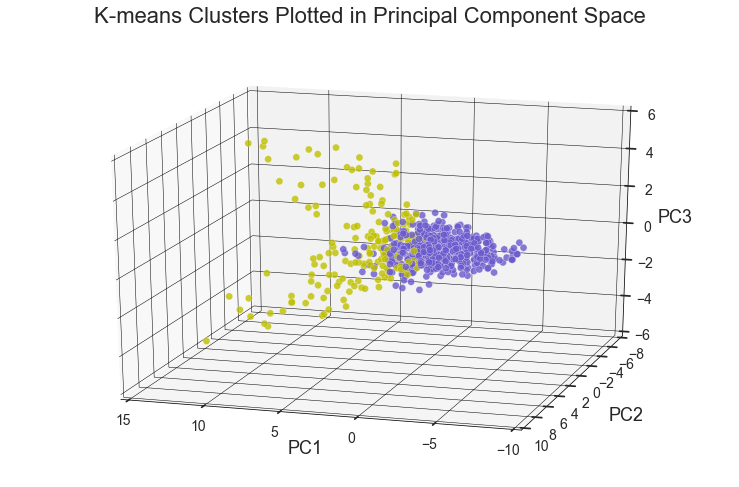

In [124]:
from ipywidgets import interact
import ipywidgets
from mpl_toolkits.mplot3d import Axes3D

# plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
plt.style.use('seaborn-whitegrid')

PCdf['colors']=pd.cut(df3['cluster'],2,labels=['slateblue','y'])
def twister(el, az):
    
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set(xlabel="PC1",ylabel="PC2",zlabel="PC3")
    ax.scatter3D(PCdf["PC1"],PCdf["PC2"],PCdf["PC3"],s=50, color=PCdf['colors'],alpha=.8,edgecolor='white')
    ax.set_title("K-means Clusters Plotted in Principal Component Space", y=1.10, fontsize=22)
    ax.view_init(elev=el, azim=az)
    ax.tick_params(axis='both', which='both', pad=5,labelsize=14)
    ax.set_xlabel('PC1',fontsize=18, labelpad=10)
    ax.set_ylabel('PC2',fontsize=18, labelpad=20)
    ax.set_zlabel('PC3',fontsize=18, labelpad=10)
    ax.w_xaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
    ax.w_yaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
    ax.w_zaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
    ax.w_xaxis.gridlines.set_lw(.5)
    ax.w_yaxis.gridlines.set_lw(.5)
    ax.w_zaxis.gridlines.set_lw(.5)
interact(twister,el=(0,360), az=(0,360));
# interact(twister, el=(0,50), az=(0,130));

#339 and 47
#15 130

# 20 107

## Conducting DBSCAN. DBSCAN is ideal for indentifying outliers within clusters. 

In [125]:
db = DBSCAN(eps=2.4, min_samples=10)


#3.8

In [126]:
# X = StandardScaler().fit_transform(xPC)

c=db.fit(xPC)

In [88]:
core_samples = db.core_sample_indices_
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [89]:
#Identifying airports that are outliers 
df4=pd.concat([df3, pd.Series(db.labels_, name='lbl'),df['year']], axis=1)
df5=df4[df4['lbl']==-1]
df5

,PC1,PC2,PC3,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,taxi_out_time,...,block_delay,gate_arrive_delay,dept_cancel,arriv_cancel,dept_diversions,arriv_diversions,airport,cluster,lbl,year
232,10.564734,-4.546014,3.373873,484570,480171,0.7413,0.6216,0.7337,15.50,18.52,...,4.62,17.23,13837.0,14480.0,790.0,1080.0,ATL,1,-1,2005
236,9.646599,-4.279651,0.759997,479957,475882,0.7775,0.5900,0.7335,13.20,21.84,...,5.70,16.54,5324.0,6303.0,1064.0,1116.0,ATL,1,-1,2009
237,8.517999,-5.794380,1.986363,469542,465911,0.7961,0.6405,0.7956,12.82,21.26,...,3.67,14.16,8198.0,9279.0,971.0,945.0,ATL,1,-1,2010
554,12.553086,4.675825,-4.475148,210060,209898,0.6688,0.3808,0.6298,22.68,35.76,...,7.21,24.92,4102.0,4089.0,236.0,635.0,JFK,1,-1,2007
565,11.272602,3.993341,-2.181909,209019,207435,0.6903,0.4335,0.6180,21.24,28.74,...,6.89,27.78,5926.0,5992.0,345.0,718.0,EWR,1,-1,2007
609,6.274900,9.149258,0.542597,35911,36118,0.5299,0.4612,0.5136,25.84,16.01,...,6.97,27.16,600.0,522.0,49.0,97.0,HPN,1,-1,2007
683,10.869485,-2.640931,2.467623,485187,484859,0.7179,0.5739,0.7210,17.79,20.23,...,5.81,19.19,11725.0,12579.0,700.0,648.0,ORD,1,-1,2004
685,11.571344,-2.545331,3.635287,466079,467039,0.7036,0.5881,0.7100,19.66,19.33,...,5.59,21.15,12915.0,13808.0,766.0,1063.0,ORD,1,-1,2006
686,12.827315,-2.365258,4.453775,455562,455118,0.6854,0.5769,0.6909,20.81,19.02,...,5.73,22.44,16618.0,17571.0,707.0,887.0,ORD,1,-1,2007
687,12.046534,-2.846657,4.237358,431539,431421,0.7049,0.6115,0.7062,19.94,18.67,...,5.44,21.90,15050.0,16094.0,801.0,1027.0,ORD,1,-1,2008


In [90]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X, labels))

Silhouette Coefficient: 0.634


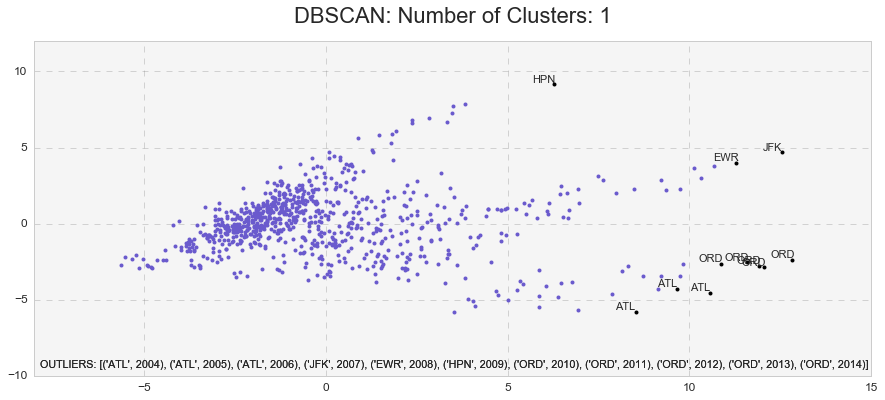

In [94]:
    fig = plt.figure(figsize=(15,6))
    plt.style.use('seaborn-whitegrid')


    plt.rcParams['axes.facecolor'] = 'whitesmoke'
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
#     colors = plt.cm.bwr(np.linspace(0, 1, len(unique_labels)))
    colors=['slateblue', 'black']
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'black'
    
        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=4)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=4)
        air_year=zip (df5['airport'], df['year'])
        plt.annotate('OUTLIERS: %s' % air_year, \
             (0.007,.05), xycoords='axes fraction', textcoords='offset points', \
             va='top', fontsize = 10.8)
        
 
    for label, x, y in zip(df5['airport'], xy[:, 0], xy[:, 1]):
        plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='center', va='top',
        fontsize=11)
# 
       
    plt.gca().set_xlim(-8,15)
    plt.gca().set_ylim(-10,12)
    plt.grid(color='gray', linestyle='--', alpha=.3)
    plt.title('DBSCAN: Number of Clusters: %d' % n_clusters_, y=1.04, fontsize=22)


In [95]:
from scipy.cluster import hierarchy
from scipy.spatial import distance as ssd

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [96]:
Z1 = hierarchy.linkage(xPC, method="average")

In [97]:
c, coph_dists = cophenet(Z1, pdist(xPC))
c

0.82274123789454412

In [98]:
Z2 = hierarchy.linkage(xPC, method="complete")

In [99]:
c, coph_dists = cophenet(Z2, pdist(xPC))
c

0.66974594887950745

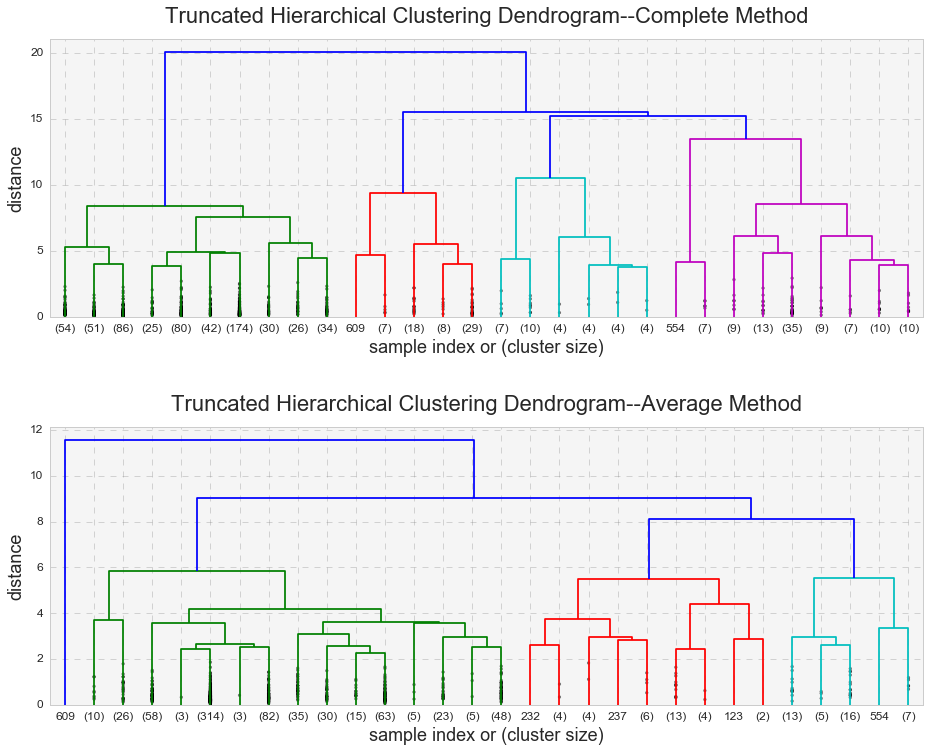

In [100]:
plt.style.use('seaborn-whitegrid')

plt.rcParams['axes.facecolor'] = 'whitesmoke'

fig, ax = plt.subplots(2,1, figsize=(13,10))
plt.tight_layout(h_pad=6)






dendrogram(
    Z2,
    truncate_mode = 'lastp',    
    show_leaf_counts = True,  
    leaf_rotation = 0,
    leaf_font_size = 12.,
    show_contracted = True, ax=ax[0])
ax[0].grid(color='gray', linestyle='--', alpha=.3)
ax[0].set_title('Truncated Hierarchical Clustering Dendrogram--Complete Method', fontsize = 22, y = 1.04)
ax[0].set_xlabel('sample index or (cluster size)', fontsize = 18)
ax[0].set_ylabel('distance', fontsize = 18)




dendrogram(
    Z1,
    truncate_mode = 'lastp',    
    show_leaf_counts = True,  
    leaf_rotation = 0,
    leaf_font_size = 12.,
    show_contracted = True, ax=ax[1])
ax[1].grid(color='gray', linestyle='--', alpha=.3)
ax[1].set_title('Truncated Hierarchical Clustering Dendrogram--Average Method', fontsize = 22, y = 1.04)
ax[1].set_xlabel('sample index or (cluster size)', fontsize = 18)
ax[1].set_ylabel('distance', fontsize = 18)
# ax[1].set_xticks(fontsize = 10)
plt.show()




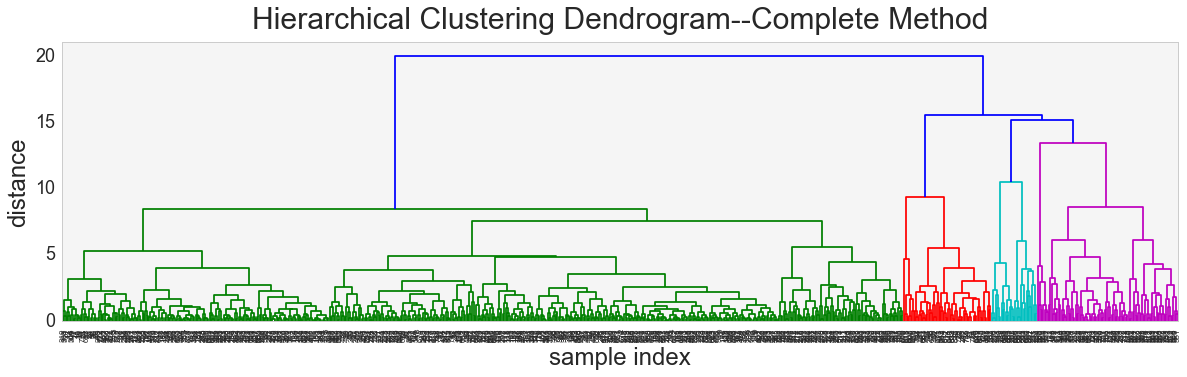

In [846]:

plt.figure(figsize=(20, 5))
plt.title('Hierarchical Clustering Dendrogram--Complete Method', fontsize = 30, y = 1.03)
plt.xlabel('sample index', fontsize = 24)
plt.xticks([])
plt.ylabel('distance', fontsize = 24)
plt.yticks(fontsize = 18)
dendrogram(
    Z2,
    leaf_rotation=90., 
    leaf_font_size=8., 
)
# plt.grid(color='gray', linestyle='--', alpha=.3)
plt.grid()
plt.show()

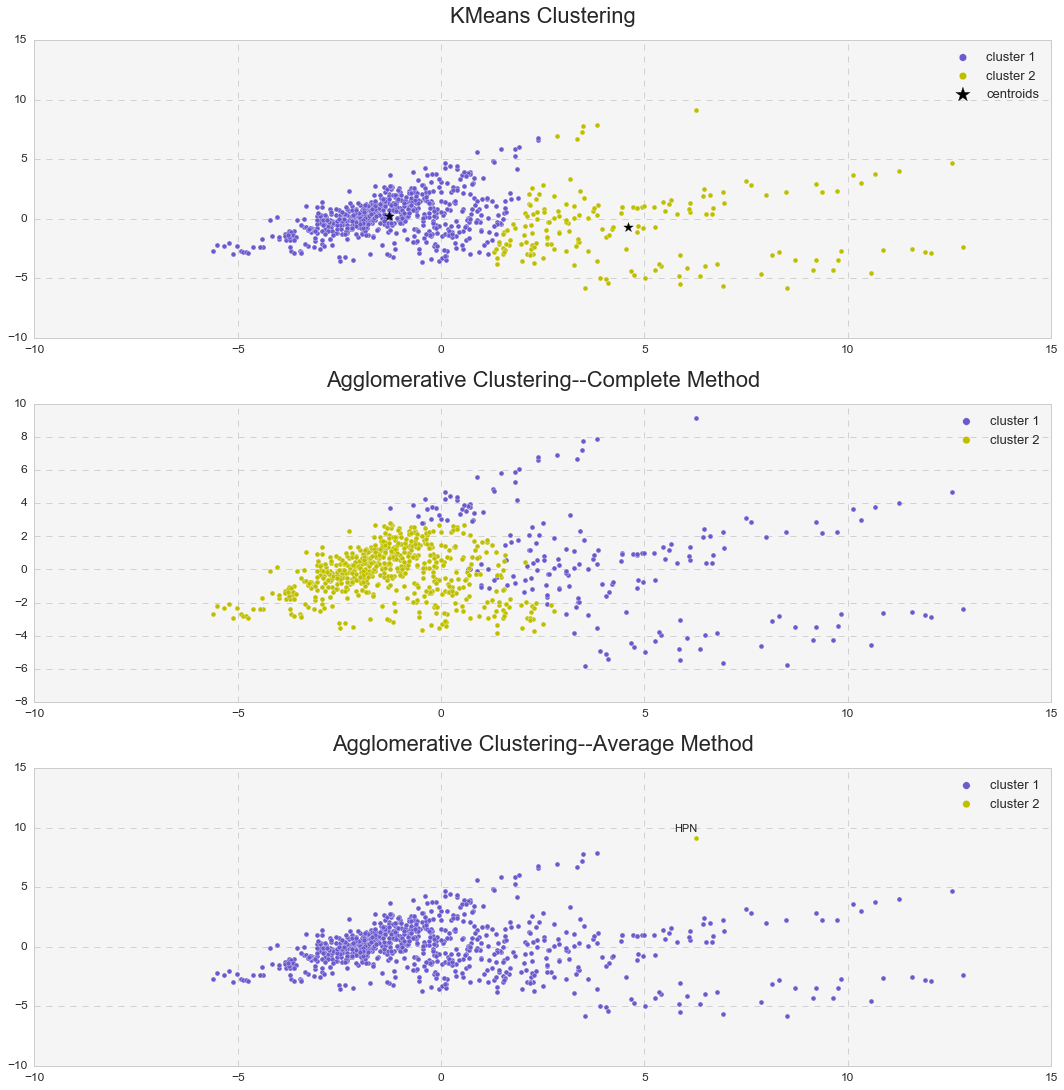

In [130]:
plt.style.use('seaborn-whitegrid')

plt.rcParams['axes.facecolor'] = 'whitesmoke'


fig, ax = plt.subplots(3,1, figsize=(15,15))
plt.tight_layout(h_pad=3)

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(xPC)
ax[0].scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='slateblue', s=25, label='cluster 1', edgecolor='white')
ax[0].scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='y', s=25, label='cluster 2', edgecolor='white')

ax[0].set_title('KMeans Clustering', fontsize=22, y=1.04)
ax[0].grid(color='gray', linestyle='--', alpha=.3)
ax[0].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],
            s=100, marker='*', c='k', label='centroids')
ax[0].legend(loc='upper right', fontsize = 13,markerscale=1.5)

ac1 = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete',compute_full_tree='auto')
y_ac1 = ac1.fit_predict(xPC)
ax[1].scatter(X[y_ac1 == 0, 0], X[y_ac1 == 0, 1], c='slateblue', s=25, label='cluster 1', edgecolor='white')
ax[1].scatter(X[y_ac1 == 1, 0], X[y_ac1 == 1, 1], c='y', s=25, label='cluster 2', edgecolor='white')
ax[1].set_title('Agglomerative Clustering--Complete Method', fontsize=22, y=1.04)
ax[1].legend(loc='upper right', fontsize = 13,markerscale=1.5)
ax[1].grid(color='gray', linestyle='--', alpha=.3)

ac2 = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='average',compute_full_tree='auto')
y_ac2 = ac2.fit_predict(xPC)
ax[2].scatter(X[y_ac2 == 0, 0], X[y_ac2 == 0, 1], c='slateblue', s=25, label='cluster 1', edgecolor='white')
ax[2].scatter(X[y_ac2 == 1, 0], X[y_ac2 == 1, 1], c='y', s=25, label='cluster 2', edgecolor='white')
ax[2].set_title('Agglomerative Clustering--Average Method', fontsize=22,y=1.04)
ax[2].legend(loc='upper right', fontsize = 13,markerscale=1.5)
ax[2].grid(color='gray', linestyle='--', alpha=.3)
for x, y in zip(X[y_ac2 == 1, 0], X[y_ac2 == 1, 1]):
    ax[2].annotate("HPN",
        xy=(x, y), xytext=(-10, 14),
        textcoords='offset points', ha='center', va='top',
        fontsize=11)





plt.show()